<a href="https://colab.research.google.com/github/nipun5/2020submissions/blob/master/Advanced%20Analytics%20with%20Statistics/Scripts/Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

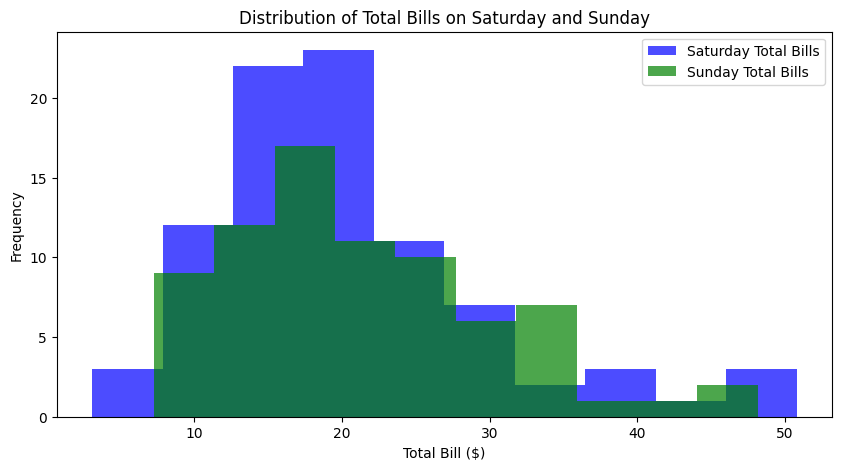

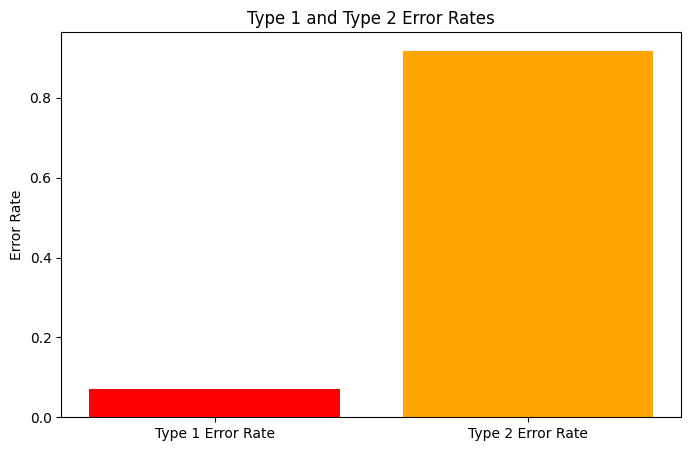

Type 1 Error Rate (False Positive): 0.07
Type 2 Error Rate (False Negative): 0.918


In [2]:
import seaborn as sns
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

# Load the tips dataset
tips_data = sns.load_dataset("tips")

# Filter data for two different days: Saturday and Sunday
saturday_bills = tips_data[tips_data['day'] == 'Sat']['total_bill']
sunday_bills = tips_data[tips_data['day'] == 'Sun']['total_bill']

# Simulation parameters
alpha = 0.05
num_simulations = 500
sample_size = 25

# Initialize counters for errors
type_1_error_count = 0
type_2_error_count = 0

# Type 1 Error Simulation: Compare Saturday vs. Saturday (identical distribution)
for _ in range(num_simulations):
    group1 = np.random.choice(saturday_bills, sample_size, replace=True)
    group2 = np.random.choice(saturday_bills, sample_size, replace=True)
    t_stat, p_value = ttest_ind(group1, group2)
    if p_value < alpha:
        type_1_error_count += 1

# Type 2 Error Simulation: Compare Saturday vs. Sunday (different distributions)
for _ in range(num_simulations):
    group1 = np.random.choice(saturday_bills, sample_size, replace=True)
    group2 = np.random.choice(sunday_bills, sample_size, replace=True)
    t_stat, p_value = ttest_ind(group1, group2)
    if p_value >= alpha:
        type_2_error_count += 1

# Calculate error rates
type_1_error_rate = type_1_error_count / num_simulations
type_2_error_rate = type_2_error_count / num_simulations

# Visualization 1: Histograms for Total Bills on Saturday and Sunday
plt.figure(figsize=(10, 5))
plt.hist(saturday_bills, bins=10, alpha=0.7, label="Saturday Total Bills", color='blue')
plt.hist(sunday_bills, bins=10, alpha=0.7, label="Sunday Total Bills", color='green')
plt.title("Distribution of Total Bills on Saturday and Sunday")
plt.xlabel("Total Bill ($)")
plt.ylabel("Frequency")
plt.legend()
plt.show()

# Visualization 2: Type 1 and Type 2 Error Rates as a Bar Chart
error_rates = [type_1_error_rate, type_2_error_rate]
error_labels = ['Type 1 Error Rate', 'Type 2 Error Rate']
plt.figure(figsize=(8, 5))
plt.bar(error_labels, error_rates, color=['red', 'orange'])
plt.title("Type 1 and Type 2 Error Rates")
plt.ylabel("Error Rate")
plt.show()

# Output results
print("Type 1 Error Rate (False Positive):", type_1_error_rate)
print("Type 2 Error Rate (False Negative):", type_2_error_rate)
